In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load ="data\mouse_drug_data.csv"
clinical_trial_data_to_load = "data\clinicaltrial_data.csv"

mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Read the Mouse and Drug Data and the Clinical Trial Data
print(mouse_drug_data_df[:5])
print(clinical_trial_data_df[:5])

# Combine the data into a single dataset

combined_clinical_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, how = 'outer', on = 'Mouse ID')

# Display the data table for preview

combined_clinical_df.head()

  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_mean = combined_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_mean = pd.DataFrame(tumor_mean).reset_index()
# Preview DataFrame
tumor_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = combined_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_se = pd.DataFrame(tumor_se).reset_index()

# Preview DataFrame
tumor_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
#Create a pivot table for tumor change to unstack the drugs values.  Create another pivot table with the standard error
#changes.  
tumor_change = tumor_mean.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumor_sem = tumor_se.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
tumor_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
#Initially thought that needed to plot all the drugs in the trial so 
#turn the column 'Drug' into a list to be able to iterate through it
drugs = combined_clinical_df['Drug'].drop_duplicates()
drugs.tolist()

['Stelasyn',
 'Propriva',
 'Naftisol',
 'Ketapril',
 'Capomulin',
 'Infubinol',
 'Ceftamin',
 'Zoniferol',
 'Ramicane',
 'Placebo']

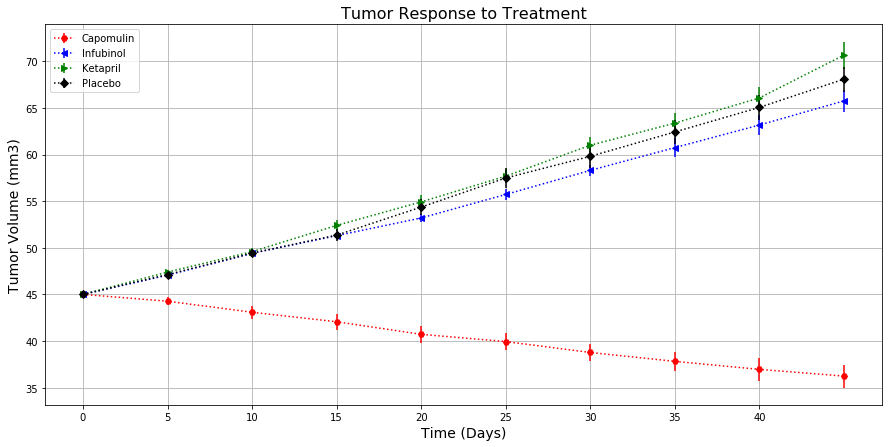

In [6]:
# The initial dict to use for plotting each individual drug
# plot_drug = {'Stelasyn':'ro:', 'Propriva': 'b^:', 'Naftisol': 'gD:', 'Ketapril': 'm1:', 'Capomulin': 'rx:', 
#              'Infubinol': 'm3:', 'Ceftamin': 'k4:', 'Zoniferol': 'rv:', 'Ramicane': 'gH:', 'Placebo': 'k>:'}

#Create a list for the drugs that were needed to be analyzed with it's corresponding dict to 
#for the color and marker for each individual drug
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plot_drug = {"Capomulin":'rH:', 'Infubinol':'b<:', 'Ketapril':'g>:', 'Placebo': 'kD:'}

#Set the initial plot for tumor change with standard errors
fig1, ax1 = plt.subplots(figsize = (15,7))

#Create a funciton to call on the drug in the drugs list with its corresponding standard error
#to plot on a scatter chart
for drug in drugs:
    ax1.errorbar(tumor_change.index, tumor_change[drug], tumor_sem[drug], fmt = plot_drug[drug])
ax1.legend(loc = 'best')

#Set the plot details such as tick intervals, size and titles on x, y, and title.  Save and show plot
plt.grid(True)
plt.title('Tumor Response to Treatment', fontsize = 16)
plt.xlabel('Time (Days)', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Tumor Response to Treatment.png')
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site = combined_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
meta_site = pd.DataFrame(meta_site).reset_index()
# Preview DataFrame
meta_site.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = combined_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
meta_sem = pd.DataFrame(meta_sem).reset_index()
# Preview DataFrame
meta_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
#Create a pivot to unstack each drug valuefor the metastatic sites change in size.  Create a pivot table for 
#the standard errors for the metastatic sitess.
meta_site_change = meta_site.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
meta_site_sem = meta_sem.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
meta_site_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


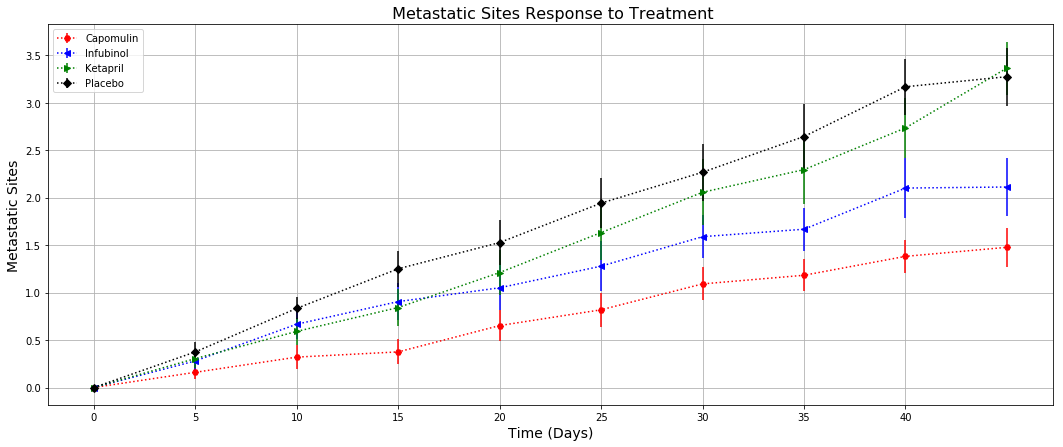

In [10]:
#Plot scatter plot #2 for the metastatic sites with their standard errors
fig2, ax2 = plt.subplots(figsize = (18, 7))

#Iteration through drugs list to plot each drug in the list
for drug in drugs:
    ax2.errorbar(meta_site_change.index, meta_site_change[drug], meta_site_sem[drug], fmt = plot_drug[drug])
ax2.legend(loc = 'best')

#Set the plot details such as tick intervals, size and titles on x, y, and title.  Save and show plot
plt.grid(True)
plt.title(' Metastatic Sites Response to Treatment', fontsize = 16)
plt.xlabel('Time (Days)', fontsize = 14)
plt.ylabel('Metastatic Sites', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Metastatic Sites Response to Treatment.png')
plt.show()

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_clinical_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
#Create a pivot table to hold values for mouse count through time for each drug
mice_count_change = mice_count.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse ID')
mice_count_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


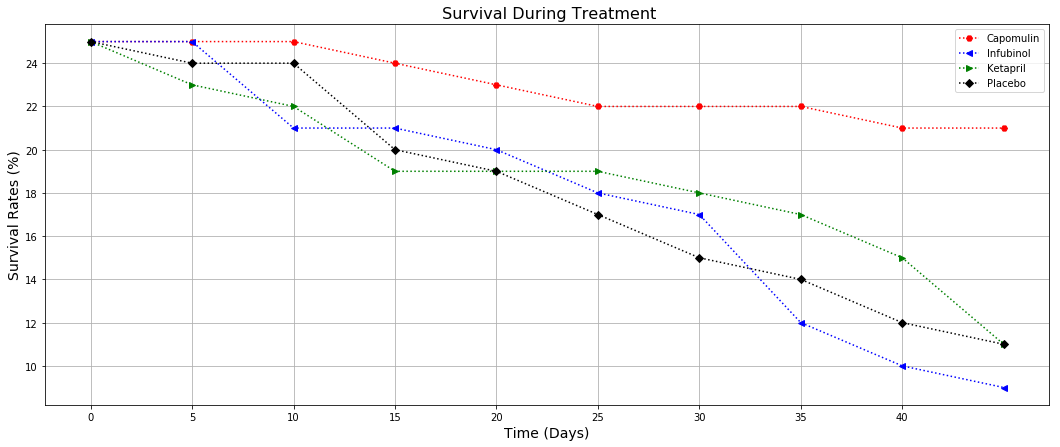

In [13]:
#Plot # 3 for the surirval rate of mouse for each drug in the list over time
fig3, ax3 = plt.subplots(figsize = (18, 7))

#function to call the drugs in the list
for drug in drugs:
    plt.plot(mice_count_change.index, mice_count_change[drug], plot_drug[drug])
ax3.legend(loc = 'best')

#Set the plot details such as tick intervals, size and titles on x, y, and title.  Save and show plot
plt.grid(True)
plt.title(' Survival During Treatment', fontsize = 16)
plt.xlabel('Time (Days)', fontsize = 14)
plt.ylabel('Survival Rates (%)', fontsize = 14)
plt.xticks(np.arange(0, 45, 5))

plt.savefig('Survival During Treatment.png')
plt.show()

In [14]:
#get the value from the last cell and first cell to find the average change in percentage
percent_change = ((tumor_change.iloc[9, :] - tumor_change.iloc[0, :]) / tumor_change.iloc[0, :]) * 100
print(percent_change)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [15]:
#Create a database for the percent values that were calculated
percent_change = pd.DataFrame(percent_change)
percent_change.head()

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


In [16]:
#Rename the column of the percent change from 0 to 'Percent Change'
#Create a new column 'Pass' to hold the value for the conditional statement
#to see which tumor size grew or skrunk by percentage
percent_change = percent_change.rename(columns = {0 : 'Percent Change'})
percent_change['Pass'] = (percent_change < 0)
percent_change

,Percent Change,Pass
Drug,,
Capomulin,-19.475303,True
Ceftamin,42.516492,False
Infubinol,46.123472,False
Ketapril,57.028795,False
Naftisol,53.923347,False
Placebo,51.297960,False
Propriva,47.241175,False
Ramicane,-22.320900,True
Stelasyn,52.085134,False


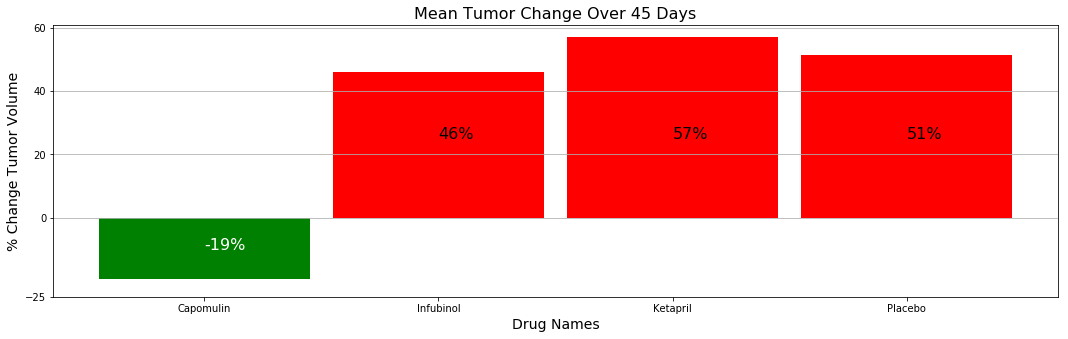

In [112]:
#Plot #4, bar chart showing the change of tumor size
fig4, ax4 = plt.subplots(figsize = (18,5))
x = 0

#Function to call the drugs in drugs list, with a conditional to 
#plot the drug one way if it pass the condition, and plot another way
#way if it fails the condition
for drug in drugs:
    change = percent_change.loc[drug, 'Percent Change']
    if percent_change.loc[drug, 'Pass'] == True:
        ax4.bar(drug, change, width = .9, color = 'g')
        plt.text(x, -10, '{:.0f}%'.format(change), color = "white", fontsize = 16)
    else:
        ax4.bar(drug, change, width = .9, color = "r")
        plt.text(x, 25, '{:.0f}%'.format(change), color = "black", fontsize = 16)
    x = 1 + x

#Set the plot details such as tick intervals, size and titles on x, y, and title.  Save and show plot
ax4.yaxis.grid()

plt.yticks((-25, 0, 20, 40, 60))
plt.title("Mean Tumor Change Over 45 Days", fontsize = 16)
plt.ylabel("% Change Tumor Volume", fontsize = 14)
plt.xlabel('Drug Names', fontsize = 14)

plt.savefig('Mean Tumor Change.png')
fig4.show()

In [ ]:
#Obseravtion 1: For the trial of Capomulin, Infubinol, Ketapril, and Placebo on potential treatments
#for squamous cell carcinoma (SCC), Capomulin shows the greatest decrease in size of tumors, the lowest
#Metastatic site increase, and greatest survival rate by mouse in the trials

In [ ]:
#Observation 2: Infubinol, Ketapril, and Placebo have the same trajectory for tumor growth through the time
#trials.  Infubinol show the least amount of tumor and metastatic site growth over the time trial, but has the 
#lowest survival rates for the 3 drugs

In [ ]:
#Observation 3: For all 4 drugs in the list the errorbars increase as the time increases.  It seems that
#the population decrease is smallest with Capomulin which is why Capomulin also has the lowest errorbars 
#because it has the greatest population.  While the remaining 3 drugs all have a lower survival rate
#with Infubinol having the lowest survival rate and greatest errorbars